<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Implementing linear regression from scratch using gradient descent.

In [3]:
# import the libraries for data preprocessing...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

100%|██████████| 400k/400k [00:00<00:00, 62.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [5]:
path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(path)
df.head()

# load the testing data
test_path = '/content/sample_data/california_housing_test.csv'
test_df = pd.read_csv(test_path)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [8]:
# some feature engineering...
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
# The data looks good with no null values

In [14]:
# selecting the target and segregating it from the features.
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# so first lets start coding up linear regression using gradient descent...

**The basic idea is to select some `num_iterations` which is basically jargon for `epocs` in ML lingo and keep minimising the cost function...**


---



**The cost function that we are going up with is standard `MSE` function and the learning rate `α` which is our hyperparameter (something that we set ourselves)**



In [17]:
# But we will need a gradient descent function too...

# Initialize parameters
def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Predict function
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Cost function (Mean Squared Error)
def compute_cost(y, y_pred):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    for epoch in range(epochs):
        # Make predictions
        y_pred = predict(X, weights, bias)

        # Calculate gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Optional: Calculate cost to monitor progress
        if epoch % 100 == 0:  # adjust frequency as desired
            cost = compute_cost(y, y_pred)
            print(f"Epoch {epoch}, Cost: {cost}")

    return weights, bias


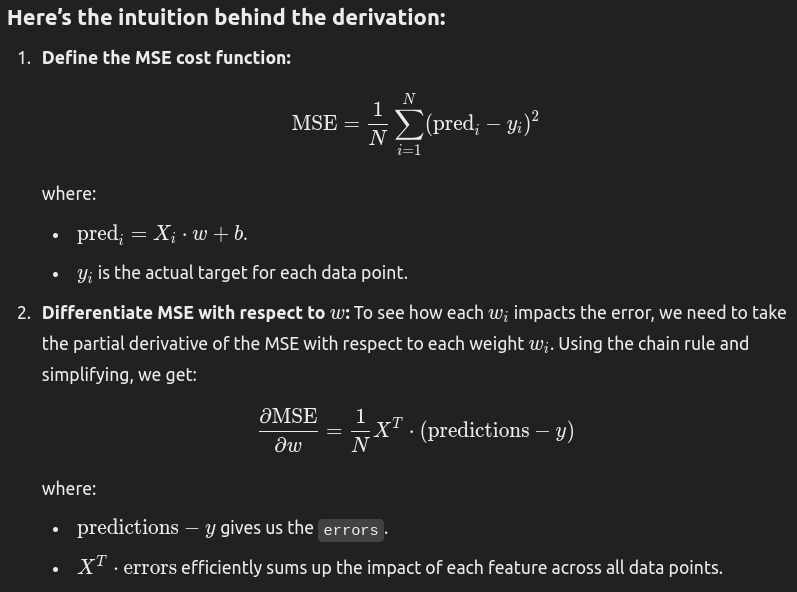

In [18]:
# okay here we go..

def linear_regression(X, y, num_iterations = 1000, learning_rate = 0.01):

  # start off with w vector as 0 vector
  w = np.zeros(X.shape[1])
  # start off with the bias as 0 (scalar value)
  b = 0

  # convert X into numpy array for vectorized operations.
  X = X.values
  y = y.values # I AM NOT SURE AS TO WHY THIS STEP IS BEING DONE... YET

  n = len(y)

  for _ in range(num_iterations):

    # calculate the error -> how do we do that ? well it is expected val - predicted value
    y_pred = predict(X, w, b) # predicted value
    errors = (y - y_pred) ** 2

    # update w and b by calculating w_gradient and b_gradient respectively.
    w_gradient = np.dot(X.T, errors) * (1/n)
    b_gradient = np.mean(errors)

    # update step
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    # calculate cost to monitor progress
    if num_iterations % 50 == 0:  # adjust frequency as desired
        cost = compute_cost(y, y_pred)
        print(f"epoch {num_iterations}, Cost: {cost}")

  print(f"Final weights: {w}")
  print(f"Final bias: {b}")
  return w, b


In [ ]:
# moment of truth...
